<a href="https://colab.research.google.com/github/AhzamAhmed6/FashionMNIST-using-CNN/blob/main/27PyTorch_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [50]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    download=True,
    train=True,
    transform=transforms.ToTensor()
)

In [51]:
test_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    download=True,
    train=False,
    transform=transforms.ToTensor()
)

In [52]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

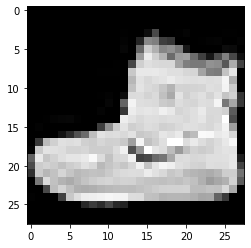

In [53]:
plt.imshow(train_dataset.data[0], cmap='gray');

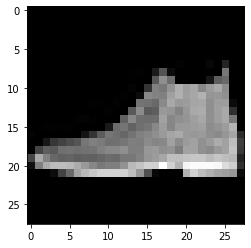

In [54]:
plt.imshow(test_dataset.data[0], cmap='gray');

In [55]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [56]:
K = len(set(train_dataset.targets.numpy()))
N = len(train_dataset.targets)
D = 28*28

In [57]:
batch_size=128
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

In [58]:
for images, labels in train_loader:
  print(images.shape)
  break

torch.Size([128, 1, 28, 28])


In [59]:
k = len(set(train_dataset.targets.numpy()))
k

10

In [60]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    # nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    # nn.ReLU(),
    # nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(16*5*5, 300),
    nn.ReLU(),
    nn.Linear(300, k)
)

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [62]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=300, bias=True)
  (8): ReLU()
  (9): Linear(in_features=300, out_features=10, bias=True)
)

In [63]:
epochs=10
def training(epochs, train_loader, test_loader, criterion, optimizer, model):
  
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)
  for i in range(epochs):
    train_loss=[]
    for input, target in train_loader:
      input, target = input.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(input)
      loss = criterion(output, target)
      train_loss.append(loss.item())
      loss.backward()
      optimizer.step()
    train_losses[i] = np.mean(train_loss)
    
    test_loss=[]
    for input, target in test_loader:
      input, target = input.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(input)
      loss = criterion(output, target)
      test_loss.append(loss.item())
      loss.backward()
      optimizer.step()
    test_losses[i] = np.mean(test_loss)
    print(f'Train Loss= {train_loss}, Test Loss= {test_loss}')
  return train_losses, test_losses

In [64]:
train_losses, test_losses = training(epochs, train_loader, test_loader, criterion, optimizer, model)

Train Loss= [2.3017866611480713, 2.2905116081237793, 2.284778118133545, 2.247265100479126, 2.2422361373901367, 2.2287046909332275, 2.2000246047973633, 2.1859374046325684, 2.153284788131714, 2.14463210105896, 2.1136438846588135, 2.076078414916992, 2.0774760246276855, 2.0247957706451416, 1.968316674232483, 1.9440537691116333, 1.9106448888778687, 1.8578097820281982, 1.7667587995529175, 1.7649235725402832, 1.6746416091918945, 1.6700448989868164, 1.6008211374282837, 1.5308914184570312, 1.4905385971069336, 1.4823466539382935, 1.3999302387237549, 1.3156596422195435, 1.4084097146987915, 1.328183650970459, 1.1765090227127075, 1.256418228149414, 1.160372018814087, 1.2217596769332886, 1.1889764070510864, 1.0234894752502441, 1.1653084754943848, 1.1474645137786865, 1.0110715627670288, 0.9696483016014099, 1.1405761241912842, 1.0162162780761719, 0.9597969055175781, 0.9696740508079529, 0.921934962272644, 0.9174630045890808, 1.0341507196426392, 0.9087667465209961, 0.9816715717315674, 0.9010760188102722

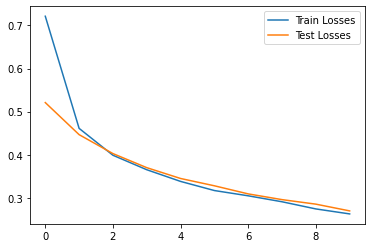

In [65]:
plt.plot(train_losses, label='Train Losses')
plt.plot(test_losses, label='Test Losses')
plt.legend();